In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPool2D, Dense, Dropout, Flatten

Using TensorFlow backend.


#### data preparation

In [4]:
from keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [7]:
# convert the label into one hot encoded
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


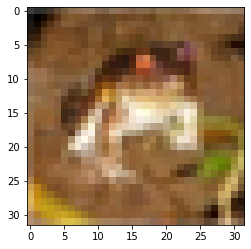

In [9]:
plt.imshow(x_train[0])
plt.show()

### CNN Model

In [24]:
model = Sequential()

In [25]:
model.add(Convolution2D(32, (3, 3), activation='relu',input_shape = (32, 32, 3)))

In [26]:
model.add(Convolution2D(64, (3, 3), activation='relu'))

In [27]:
model.add(Dropout(0.25))

In [28]:
model.add(MaxPool2D(2, 2))

In [29]:
model.add(Convolution2D(32, (5, 5), activation='relu'))

In [30]:
model.add(Convolution2D(16, (5, 5), activation='relu'))

In [31]:
model.add(Flatten())

In [32]:
model.add(Dense(10, activation='softmax'))

In [36]:
## compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 32)        51232     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 16)          12816     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [38]:
hist = model.fit(x_train,y_train,epochs=50,shuffle=True, batch_size=256, validation_split=0.135)

W0730 07:22:25.668603 140457894111040 deprecation.py:323] From /home/macab/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1251: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 43250 samples, validate on 6750 samples
Epoch 1/50
43250/43250 [==============================] - 247s 6ms/step - loss: 2.4838 - acc: 0.0966 - val_loss: 2.3027 - val_acc: 0.0950
Epoch 2/50
43250/43250 [==============================] - 271s 6ms/step - loss: 2.3026 - acc: 0.0988 - val_loss: 2.3027 - val_acc: 0.0950
Epoch 3/50
43250/43250 [==============================] - 235s 5ms/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3028 - val_acc: 0.0961
Epoch 4/50
43250/43250 [==============================] - 244s 6ms/step - loss: 2.3026 - acc: 0.0983 - val_loss: 2.3028 - val_acc: 0.0950
Epoch 5/50
43250/43250 [==============================] - 264s 6ms/step - loss: 2.3026 - acc: 0.0997 - val_loss: 2.3027 - val_acc: 0.0961
Epoch 6/50
43250/43250 [==============================] - 299s 7ms/step - loss: 2.3026 - acc: 0.1005 - val_loss: 2.3027 - val_acc: 0.0961
Epoch 7/50
24576/43250 [================>.............] - ETA: 1:57 - loss: 2.3026 - acc: 0.1001

KeyboardInterrupt: 